# Plotting 1: MLM vs. CKKW-L
MLM vs. CKKW-L jet merging.

## 1. Import Packages

In [1]:
# The Python Standard Library

# The Third-Party Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, LogLocator)

# My Packages
from plotting import plotting
# from myhep.plotting import plotting_basic, plotting

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Load Datasets

In [2]:
path_data = '/youwei_u3/svj_data_master/scheme_1/analysis_script_v1/'
# ! notice: I change the order of 'met' and 'jet'.
dataset_csv = ['status23', 'status71', 'jet', 'met', 'jet_met',
               'n_jet', 'jj', 'jjj', 'jj_met', 'jjj_met']
dataset_npz = ['neutrinos', 'weight']
file = '_rinv3_Lambdad5'

# load .csv into pd.DataFrame()
dataset_mlm, dataset_ckkwl = [], []
for i, data in enumerate(dataset_csv):
    print(i, data)
    # print(i, data + file + '_ckkwl_wo.csv')
    df_mlm = pd.read_csv(path_data + data + file + '_mlm_wo.csv')
    df_ckkwl = pd.read_csv(path_data + data + file + '_ckkwl_wo.csv')
    dataset_mlm.append(df_mlm)
    dataset_ckkwl.append(df_ckkwl)
    
# load .npz into np.array()
nu_mlm = np.load(path_data + 'neutrinos' + file + '_mlm_wo.npz')
nu_ckkwl = np.load(path_data + 'neutrinos' + file + '_ckkwl_wo.npz')
weight_mlm = np.load(path_data + 'weight' + file + '_mlm_wo.npz', allow_pickle=True)
weight_ckkwl = np.load(path_data + 'weight' + file + '_ckkwl_wo.npz', allow_pickle=True)

0 status23
1 status71
2 jet
3 met
4 jet_met
5 n_jet
6 jj
7 jjj
8 jj_met
9 jjj_met


### A. Simple check

In [3]:
len(dataset_ckkwl)

10

In [4]:
dataset_mlm[0].head()

,M_xdxdx,MT_xdxdx,mT_xdxdx,ET_xdxdx,Dphi_xdxdx,Deta_xdxdx,pT_xd,pT_xdx,eta_xd,eta_xdx
0,1462.944229,818.807100,1462.987972,1462.987972,3.121198,2.367836,413.138611,405.502350,0.125119,2.492956
1,1497.885094,1459.086030,1498.916485,1498.916485,3.072587,0.459942,718.225037,741.782776,-0.541898,-1.001840
2,1506.726013,1148.431224,1507.197874,1507.197874,3.130170,1.541384,555.869568,593.006409,-2.086558,-0.545174
3,1359.166609,1282.101304,1359.361923,1359.361923,3.121563,0.689986,631.508850,650.643494,-0.547123,-1.237109
4,1521.987899,1035.577730,1531.877777,1531.877777,2.820393,1.850708,547.682312,502.185699,-1.507787,0.342921


In [5]:
dataset_ckkwl[2].head()

,N_jet,pT_1,pT_2,pT_3,pT_4,eta_1,eta_2,eta_3,eta_4,phi_1,phi_2,phi_3,phi_4,mass_1,mass_2,mass_3,mass_4
0,2.0,87.399442,64.213808,-999.000000,-999.000000,0.187685,0.613261,-999.000000,-999.000000,-0.162607,-0.410417,-999.000000,-999.000000,13.970557,11.678316,-999.000000,-999.000000
1,3.0,156.631723,116.276794,100.766976,-999.000000,-0.720677,-1.840887,-2.304753,-999.000000,1.453170,-2.920251,-2.086857,-999.000000,24.607911,21.576661,12.046796,-999.000000
2,1.0,180.418744,-999.000000,-999.000000,-999.000000,-1.262694,-999.000000,-999.000000,-999.000000,2.763893,-999.000000,-999.000000,-999.000000,34.021953,-999.000000,-999.000000,-999.000000
3,1.0,123.361312,-999.000000,-999.000000,-999.000000,1.777785,-999.000000,-999.000000,-999.000000,-0.543866,-999.000000,-999.000000,-999.000000,23.160264,-999.000000,-999.000000,-999.000000
4,4.0,163.660012,72.199409,33.798631,25.914431,-0.501624,1.195995,1.194867,-0.849276,-2.365578,-2.805764,0.611460,1.376696,33.096091,15.648594,8.263577,8.521142


In [6]:
weight_ckkwl.files

['weight_1', 'weight_2']

In [7]:
weight_ckkwl['weight_2']

array([2.7949634e-14, 2.7949634e-14, 4.1366087e-14, ..., 3.5438452e-14,
       2.7949634e-14, 2.7949634e-14], dtype=float32)

In [8]:
print('For weight_1:')
print(f"* cross-section of MLM = {np.sum(weight_mlm['weight_1'] * (10**9))} pb")
print(f"* cross-section of CKKW-L = {np.sum(weight_ckkwl['weight_1'] * (10**9))} pb")
print('-'*80)
print('For weight_2:')
print(f"* cross-section of MLM = {np.sum(weight_mlm['weight_2'] * (10**9))} pb")
print(f"* cross-section of CKKW-L = {np.sum(weight_ckkwl['weight_2'] * (10**9))} pb")

For weight_1:
* cross-section of MLM = [0.43172395] pb
* cross-section of CKKW-L = [0.57777829] pb
--------------------------------------------------------------------------------
For weight_2:
* cross-section of MLM = 0.43172395461038116 pb
* cross-section of CKKW-L = 0.5777782906857286 pb


##### Conclusion: Well done!!

## 3. Plot

In [39]:
# define global parameters
binning = np.linspace(0, 5000, 101)
color, label = ['red', 'blue'], ['MLM', 'CKKW-L']
text = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
        r'$r_\mathrm{inv} = 0.3$', r'$\Lambda_d = 5$ GeV']
text_xy = (0.05, 0.93)
# weight
w_mlm = weight_mlm['weight_2'] * (10**9)
w_ckkwl = weight_ckkwl['weight_2'] * (10**9)
weight = [w_mlm, w_ckkwl]
# selected events
selected_all = [np.arange(dataset_mlm[0].shape[0]), np.arange(dataset_ckkwl[0].shape[0])]
s_jj_mlm = dataset_mlm[6]['selected'].to_numpy().astype('int64')
s_jj_ckkwl = dataset_ckkwl[6]['selected'].to_numpy().astype('int64')
print(f'dtype of selected of MLM: {s_jj_mlm.dtype}\ndtype of selected of CKKW-L: {s_jj_ckkwl.dtype}')

dtype of selected of MLM: int64
dtype of selected of CKKW-L: int64


### 3-1. Number of jets

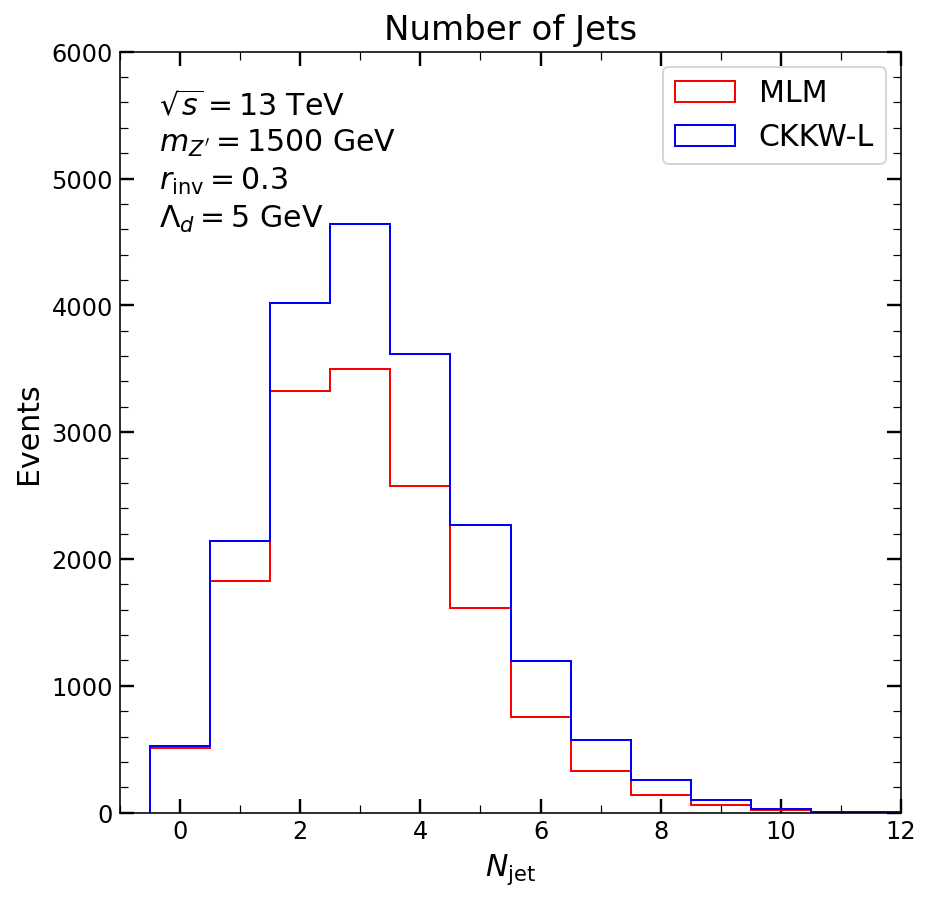

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [14647 19373]


In [30]:
# [dataset_ckkwl[5], dataset_ckkwl[2]]
hist, bins = plotting('N_jet', [dataset_mlm[2], dataset_ckkwl[2]],
                      np.linspace(0, 20, 21), color, label, align='left',
                      set_title='Number of Jets',
                      xlabel=r'$N_\mathrm{jet}$', ylabel='Events',
                      x_minor_locator=MultipleLocator(1), y_minor_locator=AutoMinorLocator(),
                      xlim=(-1, 12), ylim=(0, 6000),
                      text=text, text_xy=text_xy, savefig='./figures_1/fig_01-N_jet.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)}')

### 3-2. Dark quark pair
* $M(\chi, \bar{\chi})$
* $M_T(\chi, \bar{\chi})$
* $m_T(\chi, \bar{\chi})$
* $\Delta\phi(\chi, \bar{\chi})$
* $\Delta\eta(\chi, \bar{\chi})$
* $p_T(\chi),\ p_T(\bar{\chi})$
* $\eta(\chi),\ \eta(\bar{\chi})$

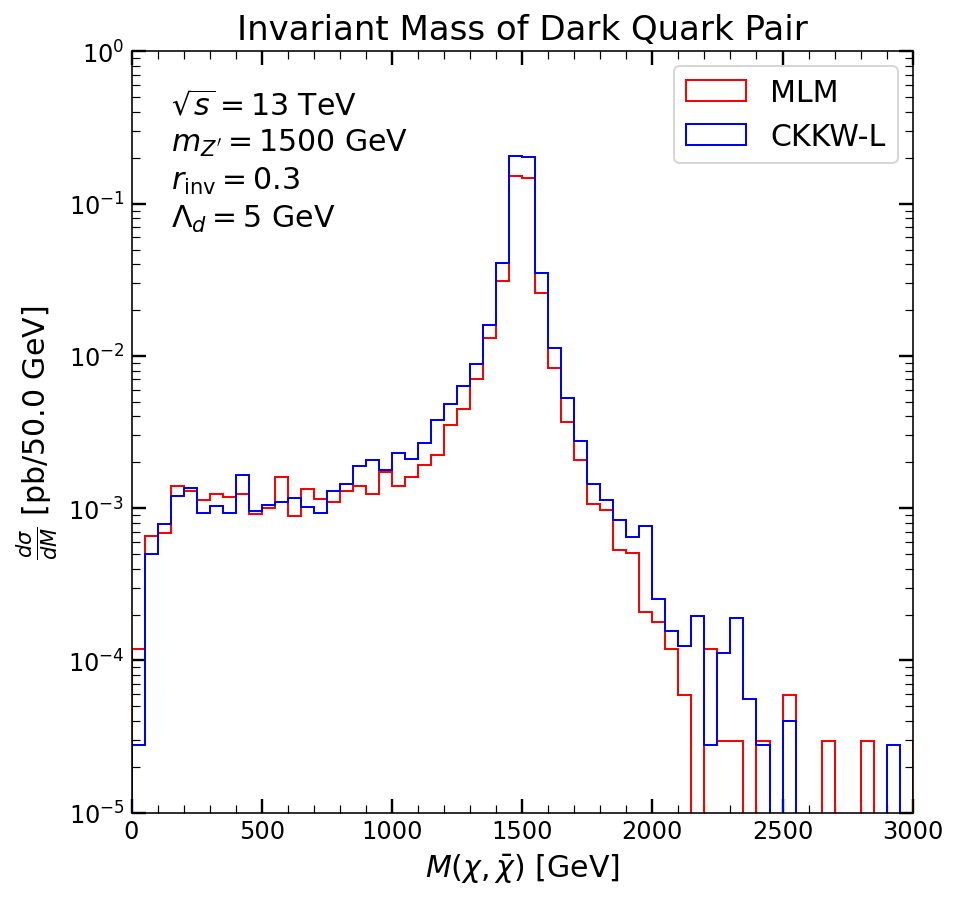

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829]


In [47]:
hist, bins = plotting('M_xdxdx', [dataset_mlm[0], dataset_ckkwl[0]],
                      binning, color, label, weight=weight, selected=selected_all,
                      set_title='Invariant Mass of Dark Quark Pair',
                      xlabel=r'$M(\chi, \bar{\chi})$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dM}$ [pb/50.0 GeV]',
                      yscale='log', y_minor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text, text_xy=text_xy, savefig='./figures_1/fig_02-M_xdxdx.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)}')

In [27]:
dataset_ckkwl[0].head()

,M_xdxdx,MT_xdxdx,mT_xdxdx,ET_xdxdx,Dphi_xdxdx,Deta_xdxdx,pT_xd,pT_xdx,eta_xd,eta_xdx
0,1533.652864,1003.817572,1533.695080,1533.695080,3.133986,1.973794,507.201447,496.481354,0.431692,-1.542102
1,1499.241203,1153.038215,1503.707073,1503.707073,2.944311,1.507256,589.262390,569.403992,-0.132120,-1.639376
2,1520.357868,454.273074,1531.794487,1531.794487,2.643109,3.696218,318.797668,171.947754,1.541331,-2.154887
3,1463.723784,556.672130,1463.804979,1463.804979,3.114872,3.243064,285.016785,271.509338,1.744532,-1.498532
4,1422.351286,1018.004155,1425.646474,1425.646474,3.128751,1.728263,462.875916,559.529846,-0.715840,1.012423


## Test

In [43]:
dataset_ckkwl[2]['N_jet'].astype('int64').dtypes

dtype('int64')

In [46]:
dataset_ckkwl[2].astype({'N_jet': 'int64'}).dtypes

N_jet       int64
pT_1      float64
pT_2      float64
pT_3      float64
pT_4      float64
eta_1     float64
eta_2     float64
eta_3     float64
eta_4     float64
phi_1     float64
phi_2     float64
phi_3     float64
phi_4     float64
mass_1    float64
mass_2    float64
mass_3    float64
mass_4    float64
dtype: object